In [1]:
import matplotlib.pyplot as plt

from dataset_4 import get_c1_data, get_c2_data, get_all_data
from reduction.PCA import pca, plot_explained_var


%load_ext autoreload
%autoreload 2

# PCA

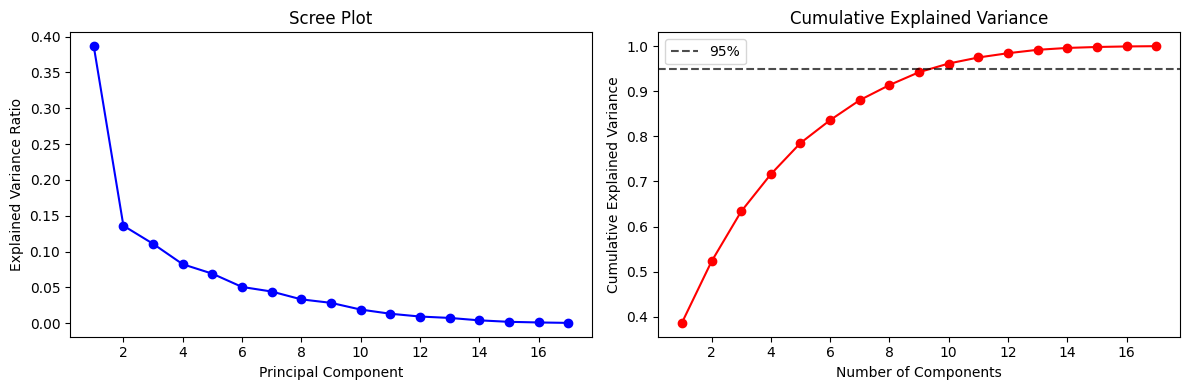

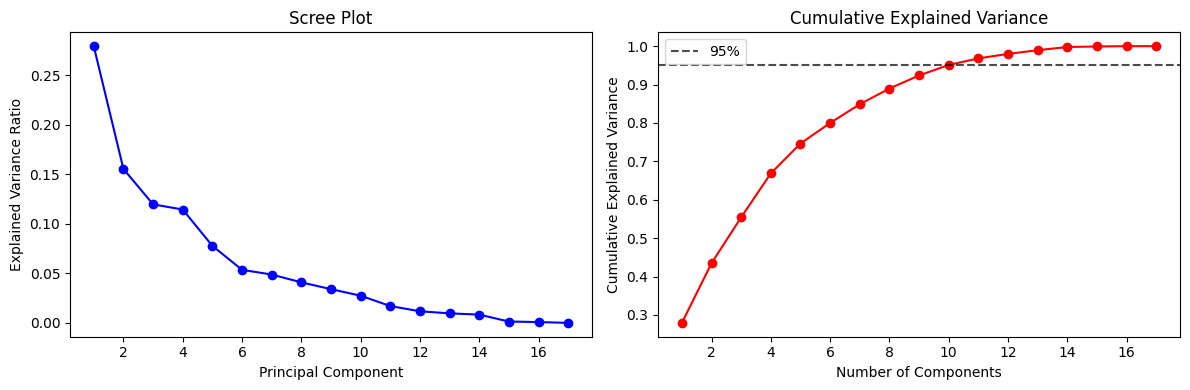

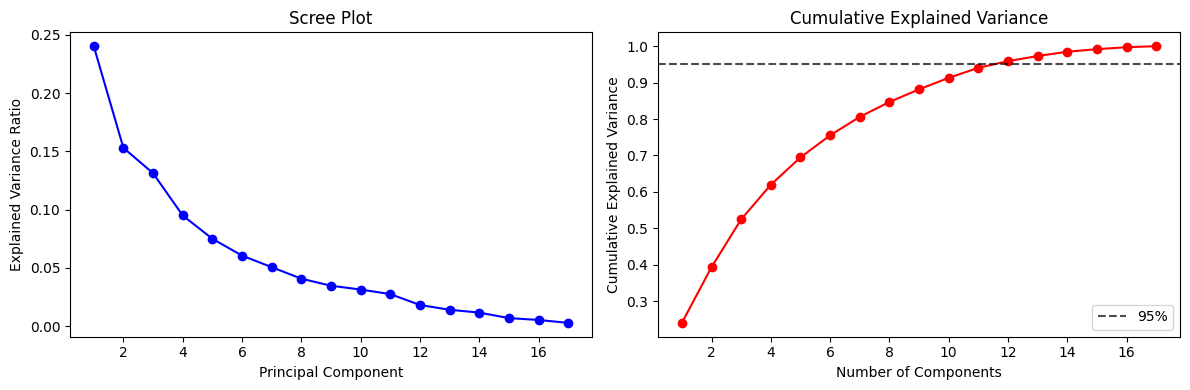

In [2]:
df_c1, X_c1 = get_c1_data()
fig = plot_explained_var(X_c1)
plt.show()

df_c2, X_c2 = get_c2_data()
fig = plot_explained_var(X_c2)
plt.show()

df, X = get_all_data()
fig = plot_explained_var(X)
plt.show()

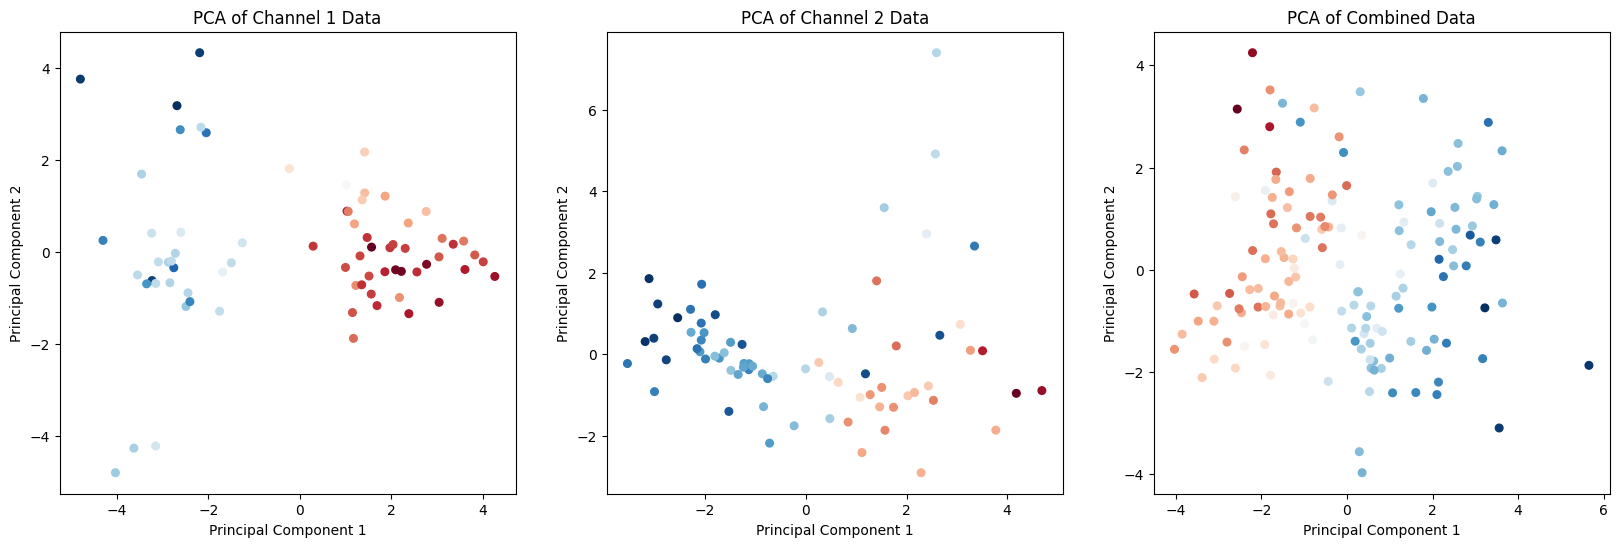

In [3]:
n_components = 10
X_c1_PCA = pca(X_c1, n_components=n_components)
X_c2_PCA = pca(X_c2, n_components=n_components)
X_PCA = pca(X, n_components=n_components)

metric = 2
# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("PCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("PCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("PCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

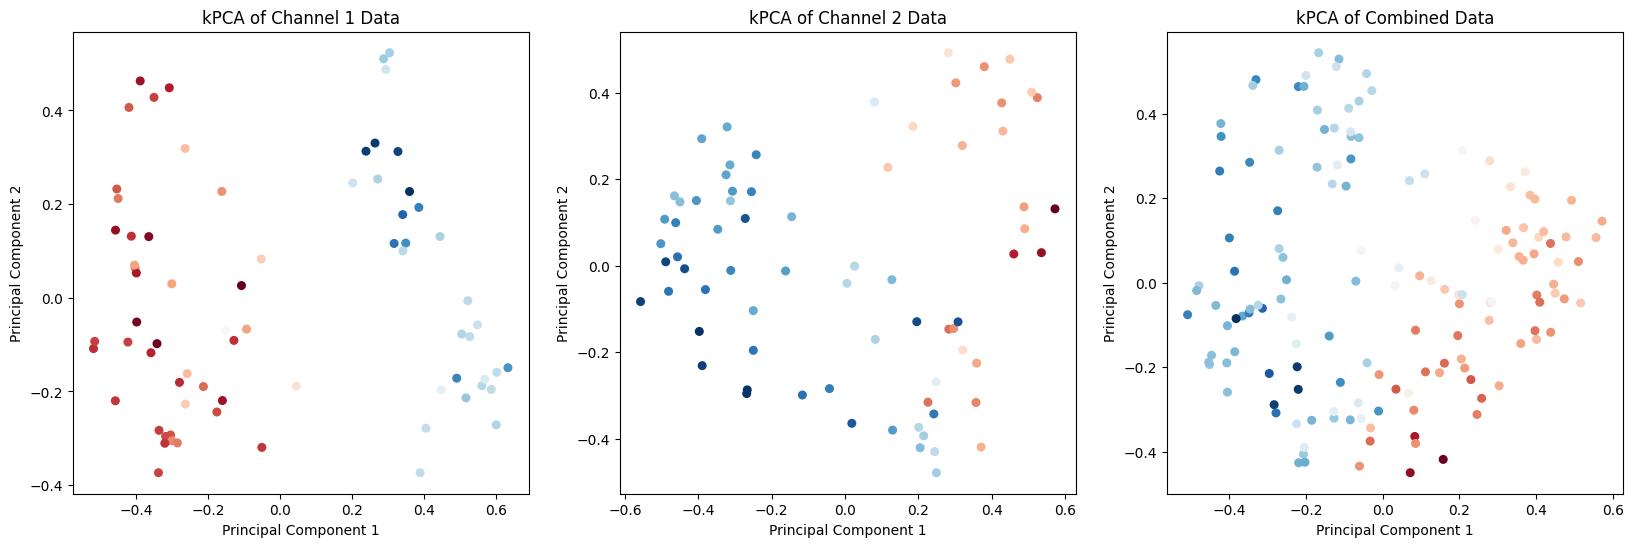

In [4]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

n_components = 6
X_c1_kPCA = kpca(X_c1, n_components=n_components)
X_c2_kPCA = kpca(X_c2, n_components=n_components)
X_kPCA = kpca(X, n_components=n_components)

metric = 2
# Color by first column of df_c1
# plt.figure(figsize=(10, 6))

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("kPCA of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(
    X_c1_kPCA[:, 0], X_c1_kPCA[:, 1], c=df_c1.iloc[:, metric], cmap="RdBu", s=30
)

axs[1].set_title("kPCA of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(
    X_c2_kPCA[:, 0], X_c2_kPCA[:, 1], c=df_c2.iloc[:, metric], cmap="RdBu", s=30
)

axs[2].set_title("kPCA of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_kPCA[:, 0], X_kPCA[:, 1], c=df.iloc[:, metric], cmap="RdBu", s=30)

plt.show()

In [5]:
print(X_c1.shape)
print(X_c1_PCA.shape)
print(X_c1_kPCA.shape)

(72, 17)
(72, 10)
(72, 6)


In [6]:
from clustering.kmeans import kmeans

k = 2
df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
df["cluster"] = kmeans(X_PCA, k=k)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["cluster"], cmap="viridis", s=30)

axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["cluster"], cmap="viridis", s=30)

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["cluster"], cmap="viridis", s=30)

plt.show()

ValueError: Length of values (2) does not match length of index (72)

In [ ]:
from clustering.kmeans import kmeans
import matplotlib.pyplot as plt
import numpy as np

k = 2
df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
df["cluster"] = kmeans(X_PCA, k=k)

# Define symbols for each cluster
symbols = [
    "o",
    "^",
    "s",
    "D",
    "v",
    "<",
    ">",
    "p",
    "*",
    "h",
]  # Can handle up to 10 clusters
colors = [
    "blue",
    "red",
    "green",
    "purple",
    "orange",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Channel 1
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c1["cluster"] == cluster_id
    axs[0].scatter(
        X_c1_PCA[mask, 0],
        X_c1_PCA[mask, 1],
        marker=symbols[cluster_id],
        color=colors[cluster_id],
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[0].legend()

# Channel 2
axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df_c2["cluster"] == cluster_id
    axs[1].scatter(
        X_c2_PCA[mask, 0],
        X_c2_PCA[mask, 1],
        marker=symbols[cluster_id],
        color=colors[cluster_id],
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[1].legend()

# Combined
axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
for cluster_id in range(k):
    mask = df["cluster"] == cluster_id
    axs[2].scatter(
        X_PCA[mask, 0],
        X_PCA[mask, 1],
        marker=symbols[cluster_id],
        color=colors[cluster_id],
        s=50,
        alpha=0.7,
        label=f"Cluster {cluster_id}",
    )
axs[2].legend()

plt.tight_layout()
plt.show()

In [7]:
from clustering.kmeans import kmeans

k = 2
df_c1["cluster"] = kmeans(X_c1_PCA, k=k)
df_c2["cluster"] = kmeans(X_c2_PCA, k=k)
df["cluster"] = kmeans(X_PCA, k=k)

fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].set_title("KMeans Clustering of Channel 1 Data")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")
axs[0].scatter(X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["cluster"], cmap="viridis", s=30)

axs[1].set_title("KMeans Clustering of Channel 2 Data")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].scatter(X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["cluster"], cmap="viridis", s=30)

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["cluster"], cmap="viridis", s=30)

plt.show()

ValueError: Length of values (2) does not match length of index (72)

In [9]:
from clustering.kmeans import plot_kmeans_elbow

plot_kmeans_elbow(X_PCA, max_k=10)
plot_kmeans_elbow(X_c1_PCA, max_k=10)
plot_kmeans_elbow(X_c2_PCA, max_k=10)

TypeError: cannot unpack non-iterable KMeans object

In [ ]:
X_c1_PCA.shape

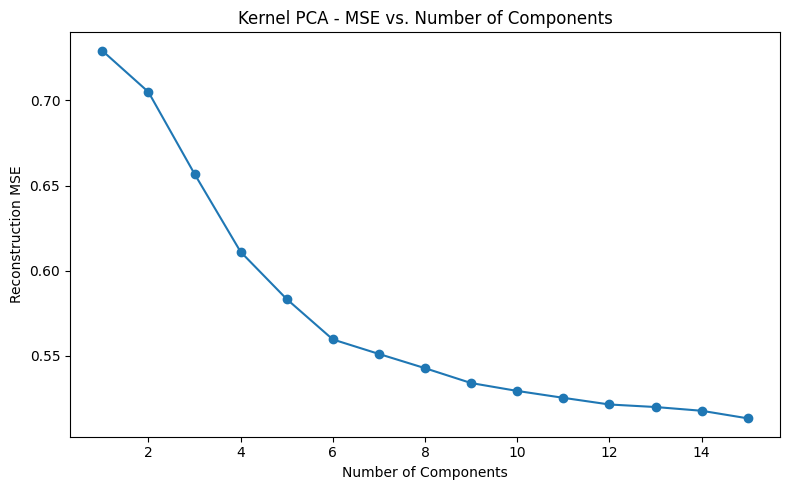

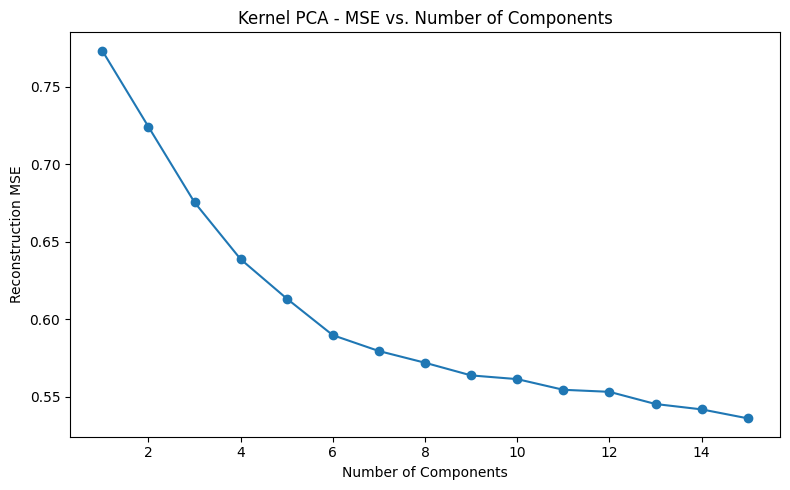

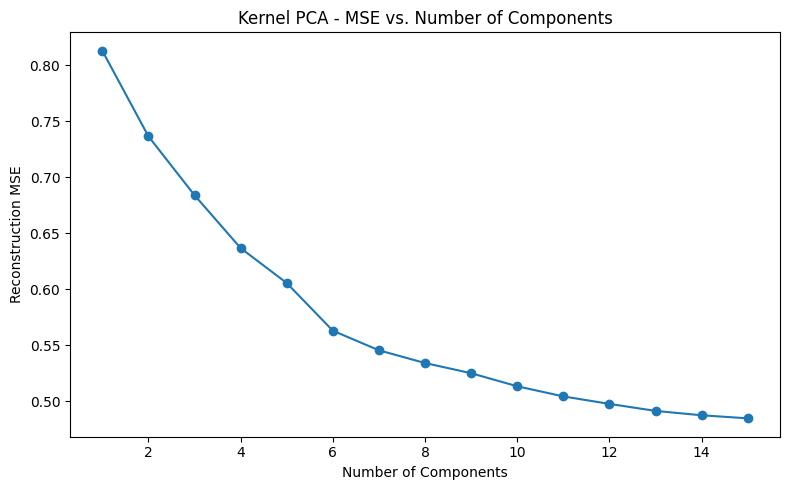

In [10]:
from reduction.kPCA import kpca, plot_kpca_mse_vs_pc

plot_kpca_mse_vs_pc(X_c1)
plot_kpca_mse_vs_pc(X_c2)
plot_kpca_mse_vs_pc(X)

In [11]:
from reduction.compare import evaluate_embeddings


results = evaluate_embeddings(X_c1, X_c1_PCA, X_c1_kPCA)

Distance preservation (Spearman ρ, ↑ better):
  PCA  : 0.9980
  kPCA : 0.7009

K‑NN overlap (k=10, ↑ better):
  PCA  : 0.9097
  kPCA : 0.6292

🏆  **PCA embedding wins** (lower rank total)


In [17]:
from clustering.HDBSCAN import optimize_hdbscan_params
from clustering.affinity import optimize_ap_params

model, labels = optimize_ap_params(X_PCA)
labels

Running grid search …

damp    pref        k    silhouette  calinski    davies      
0.50    None        17   0.1488      17.00       1.4278      
0.50    -55.595     9    0.1559      20.98       1.5587      
0.50    -25.852     17   0.1488      17.00       1.4278      
0.50    -9.682      42   0.1767      14.47       0.8829      
0.70    None        16   0.1368      17.05       1.5084      
0.70    -55.595     9    0.1956      21.34       1.3052      
0.70    -25.852     16   0.1368      17.05       1.5084      
0.70    -9.682      42   0.1767      14.47       0.8829      
0.90    None        16   0.1368      17.05       1.5084      
0.90    -55.595     10   0.1693      20.70       1.3753      
0.90    -25.852     16   0.1368      17.05       1.5084      
0.90    -9.682      46   0.1595      13.35       0.8369      
0.95    -9.682      12   0.1015      12.40       1.2456      

Best hyper‑parameters → {'damping': 0.7, 'preference': np.float64(-55.59478692327632)} | silhouette=0.1956, 

array([2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 8, 1, 7, 2, 1, 1,
       7, 2, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3,
       6, 3, 5, 3, 3, 3, 3, 8, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 6, 3, 6, 1, 8, 6, 3, 6, 4, 6, 5, 6, 5, 6, 6,
       6, 5, 3, 5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 7, 7, 8, 8, 7, 5, 7, 3, 7, 7, 7, 8, 7, 7, 7, 7,
       7, 5, 7, 7, 7, 6, 7, 1, 7, 7, 7, 7])

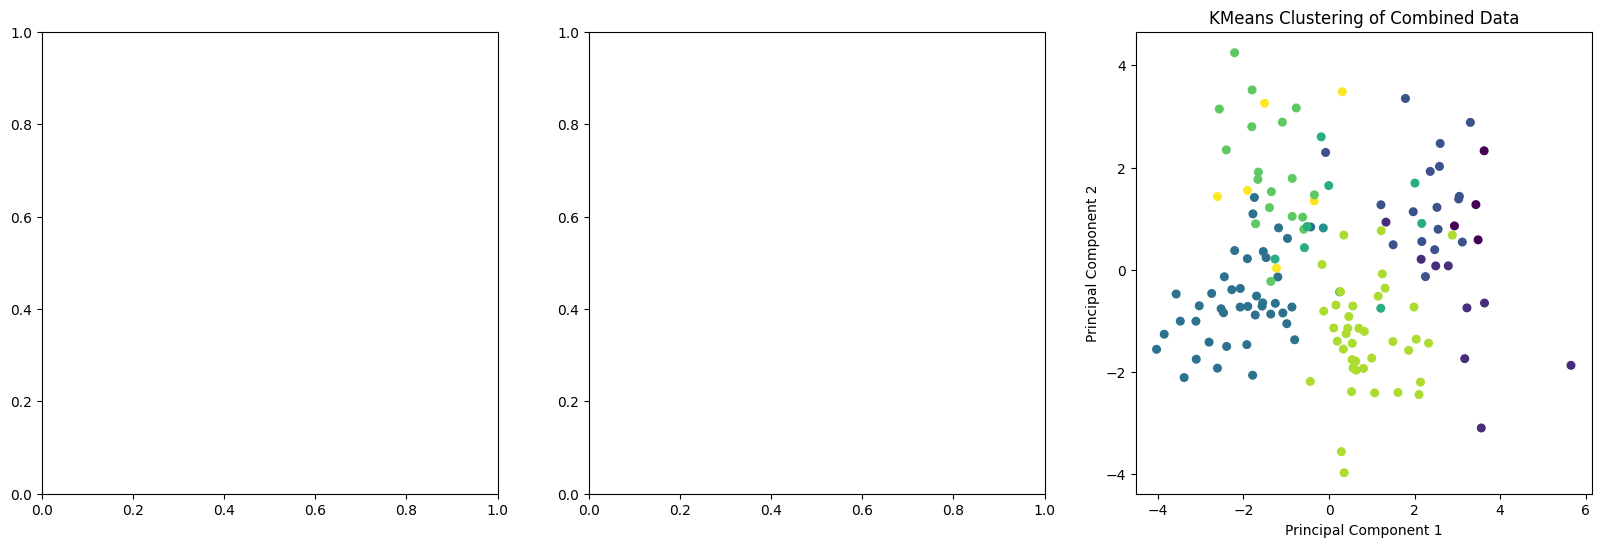

In [19]:
df["ap_cluster"] = labels
# df_c1["ap_cluster"] = labels
# df_c2["ap_cluster"] = labels
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
# axs[0].set_title("KMeans Clustering of Channel 1 Data")
# axs[0].set_xlabel("Principal Component 1")
# axs[0].set_ylabel("Principal Component 2")
# axs[0].scatter(
#     X_c1_PCA[:, 0], X_c1_PCA[:, 1], c=df_c1["ap_cluster"], cmap="viridis", s=30
# )

# axs[1].set_title("KMeans Clustering of Channel 2 Data")
# axs[1].set_xlabel("Principal Component 1")
# axs[1].set_ylabel("Principal Component 2")
# axs[1].scatter(
#     X_c2_PCA[:, 0], X_c2_PCA[:, 1], c=df_c2["ap_cluster"], cmap="viridis", s=30
# )

axs[2].set_title("KMeans Clustering of Combined Data")
axs[2].set_xlabel("Principal Component 1")
axs[2].set_ylabel("Principal Component 2")
axs[2].scatter(X_PCA[:, 0], X_PCA[:, 1], c=df["ap_cluster"], cmap="viridis", s=30)

plt.show()